In [167]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats                      
from iminuit import Minuit
from iminuit.cost import LeastSquares
from itertools import accumulate

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import pandas as pd

In [168]:
t_HLA = np.load('times_HLA.npy')
t_DAZ = np.load('times_DAZ.npy')
t_LWN = np.load('times_LWN.npy')
t_PVX = np.load('times_PVX.npy')

t1 = t_HLA
t2 = (t_DAZ[:-1] + t_DAZ[1:])[::2]
t3 = (t_LWN[:-2] + t_LWN[1:-1] + t_LWN[2:])[::3]
t4 = (t_PVX[:-2] + t_PVX[1:-1] + t_PVX[2:])[::3]

t1_sum = np.cumsum(t1)
t2_sum = np.cumsum(t2)
t3_sum = np.cumsum(t3)
t4_sum = np.cumsum(t4)

t1_mean = np.mean(t1)
t2_mean = np.mean(t2)
t3_mean = np.mean(t3)
t4_mean = np.mean(t4)

t1_std = np.std(t1)
t2_std = np.std(t2)
t3_std = np.std(t3)
t4_std = np.std(t4)

min_valuse = min(len(t1), len(t2), len(t3), len(t4))

all_times = np.zeros((4, min_valuse))
all_times[0, :] = t1[:min_valuse]
all_times[1, :] = t2[:min_valuse]
all_times[2, :] = t3[:min_valuse]
all_times[3, :] = t4[:min_valuse]
times = np.mean(all_times, axis=0)

times_sum = np.cumsum(times)


In [169]:
save_plots = False
Minuit.print_level = 0

#Uncertaintees
a = 9.82
b = 0
sigmay = np.std(t2)

x = np.arange(len(t2_sum))+1
y = np.array(t2_sum) 
sy = sigmay*np.ones_like(x)

def fit_func(x, a, b): 
    return a*x + b

chi2 = LeastSquares(x,y,sy,fit_func)

def chi2_func(a,b):
    return np.sum(((y - fit_func(x,a,b)) / sy)**2)

mfit = Minuit(chi2_func,a=a,b=b)

mfit.migrad();

a_fit = mfit.values['a']
b_fit = mfit.values['b']
sigma_a_fit = mfit.errors['a']
sigma_b_fit = mfit.errors['b']

Nvar = 2                     
Ndof_fit = len(t2) - Nvar

Chi2_fit = mfit.fval                            
Prob_fit = stats.chi2.sf(Chi2_fit, Ndof_fit)



print(f"  Fit: a={a_fit:6.3f}+-{sigma_a_fit:5.3f}  b={b_fit:5.3f}+-{sigma_b_fit:5.3f}  p={Prob_fit:6.4f}")



  Fit: a= 9.397+-0.001  b=-0.033+-0.029  p=0.8317


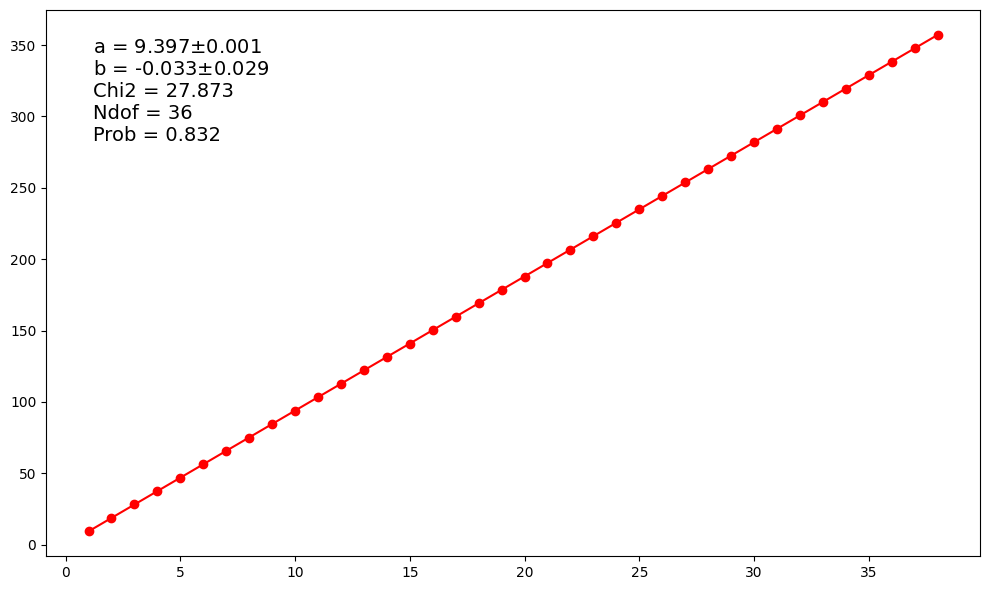

In [170]:
fig, ax = plt.subplots(figsize=(10,6))

ax.errorbar(x, y, sy, fmt='ro', ecolor='k', elinewidth=2, capsize=2, capthick=1)
ax.plot(x, fit_func(x, *mfit.values[:]), '-r')

fit_info = [f'a = {a_fit:5.3f}' + r'$\pm$' +  f"{sigma_a_fit:5.3f}",
            f'b = {b_fit:5.3f}' + r'$\pm$' + f"{sigma_b_fit:5.3f}",
            f'Chi2 = {Chi2_fit:5.3f}',
            f'Ndof = {Ndof_fit:d}',
            f'Prob = {Prob_fit:5.3f}',
]
ax.text(0.05, 0.76, "\n".join(fit_info), fontsize=14, transform = ax.transAxes)
fig.tight_layout()


[[-0.5         2.8118054 ]
 [-0.4998      2.8118054 ]
 [-0.4996      2.8118054 ]
 ...
 [ 4.4994      2.81146476]
 [ 4.4996      2.81146476]
 [ 4.4998      2.8118054 ]]


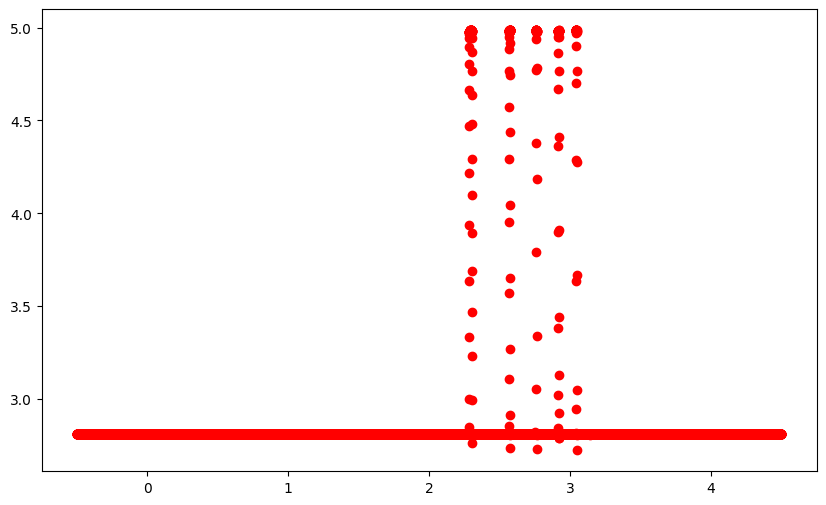

In [171]:
import glob as gb

files = gb.glob('måling_ude_på_et_skråplan/*.csv')


data = np.genfromtxt('måling_ude_på_et_skråplan/data_side_2_ball_peter.csv', delimiter=',', skip_header=15, usecols=(0,1))
print(data)

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(data[:,0], data[:,1], 'ro')

In [172]:
data_peaks = data[data[:,1] > 4.5]

time_start = data_peaks[(np.abs(np.roll(data_peaks,1,axis=0)-data_peaks)[:,0]) > 0.01][:,0]
time_stop =data_peaks[(np.abs(np.roll(data_peaks,-1,axis=0)-data_peaks)[:,0]) > 0.01][:,0]

t  =  time_start + (time_stop - time_start)/2 - time_start[0]
print(t)




[0.0093 0.2864 0.4752 0.6334 0.7595]


In [ ]:
sensor_afstand_1 = np.array([18.6,36.4,54.5,73.6,91.2]) / 100
sensor_afstand_2 = np.array([18.7,36.3,54.6,73.5,91.2]) / 100
sensor_afstand_3 = np.array([18.7,36.4,54.6,73.55,91.65]) / 100
sensor_afstand_4 = np.array([18.4,36.4,54.5,73.5,91.2]) / 100
samlet_afstand = (sensor_afstand_1 + sensor_afstand_2 + sensor_afstand_3 + sensor_afstand_4) / 4 

d_r_inder = 0.006 
bold_1 = 0.01
bold_2 = 0.0125
vinkel_v = (76.1 + 76.5 + 76.1 + 76.2) / 4
vinkel_h = (76 + 76.3 + 75.95 + 75.9) / 4 
vinkel_v1 = (76.4 + 76.5 + 76.2 + 76.3) / 4
vinkel_h1 = (75.9 + 76.5 + 76 + 76) / 4
samlet_vinkel = (vinkel_v + vinkel_h + vinkel_v1 + vinkel_h1) / 4


TypeError: array() takes from 1 to 2 positional arguments but 4 were given

In [ ]:
a, b, c = 9.82, 0, 0
sigmay = 0.2

x = np.array(t)

y = np.cumsum(samlet_afstand)
sy = sigmay * np.ones_like(x)

def fit_func(x, a, b, c): 
    return 1/2*a*x**2 + b*x + c

chi2 = LeastSquares(x,y,sy,fit_func)

def chi2_func( a, b, c):
    return np.sum(((y - fit_func(x, a, b, c)) / sy)**2)

mfit = Minuit(chi2_func,a=a,b=b, c=c)

mfit.migrad()

a_fit = mfit.values['a']
b_fit = mfit.values['b']
c_fit = mfit.values['c']
sigma_c_fit = mfit.errors['c']
sigma_a_fit = mfit.errors['a']
sigma_b_fit = mfit.errors['b']

Nvar = 3                   
Ndof_fit = len(t) - Nvar

Chi2_fit = mfit.fval                            
Prob_fit = stats.chi2.sf(Chi2_fit, Ndof_fit)
print(f"fit: a={a_fit:6.3f}+-{sigma_a_fit:5.3f}  b={b_fit:5.3f}+-{sigma_b_fit:5.3f}  c={c_fit:5.3f}+-{sigma_c_fit:5.3f}  p={Prob_fit:6.4f}")
    


fit: a= 1.389+-3.025  b=0.435+-1.202  c=0.182+-0.204  p=1.0000


Text(0.05, 0.76, 'a = 1.389$\\pm$3.025\nb = 0.435$\\pm$1.202\nc = 0.182$\\pm$0.204\nChi2 = 0.000\nNdof = 2\nProb = 1.000')

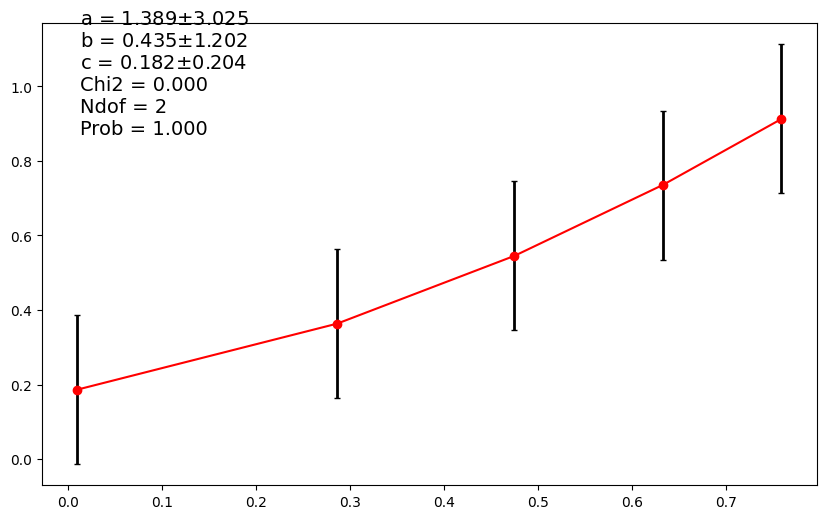

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.errorbar(x, y, sy, fmt='ro', ecolor='k', elinewidth=2, capsize=2, capthick=1)
ax.plot(x, fit_func(x, *mfit.values[:]), '-r')      

fit_info = [f'a = {a_fit:5.3f}' + r'$\pm$' +  f"{sigma_a_fit:5.3f}",
            f'b = {b_fit:5.3f}' + r'$\pm$' + f"{sigma_b_fit:5.3f}",
            f'c = {c_fit:5.3f}' + r'$\pm$' + f"{sigma_c_fit:5.3f}",
            f'Chi2 = {Chi2_fit:5.3f}',
            f'Ndof = {Ndof_fit:d}',
            f'Prob = {Prob_fit:5.3f}',
]

ax.text(0.05, 0.76, "\n".join(fit_info), fontsize=14, transform = ax.transAxes)


In [ ]:
a_1 = a_fit 
theta = np.deg2rad(180-samlet_vinkel-90)
g = (a_1 / np.sin(theta)) * (1+(2/5)*(bold_1**2) / (bold_1**2 - d_r_inder**2))
print(g)



9.446998559172409
